In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula as sm
import statsmodels.formula.api as smf

from calidad_datos2 import calidad_datos

import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (5, 3) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

# Desafío 1: Preparar el ambiente de trabajo
- lista con los nombres de variables importadas
- un análisis descriptivo mediante <code>.describe()</code>
- Distribución de categorías para las variables <code>famhist y chd</code>

In [14]:
df = pd.read_csv('southafricanheart.csv', index_col=0)
print(df.shape)
df.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [15]:
# Lista con nombres de variables importadas
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [16]:
#Revisar la calidad de datos del df
calidad = calidad_datos(df)
calidad

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
sbp,int64,0,0.0,0,0.000000,462.0,NaN,NaN,NaN,138.32684,20.496317,101.0,124.0,134.0,148.0,218.0,24.0,88.0,184.0,15
typea,int64,0,0.0,0,0.000000,462.0,NaN,NaN,NaN,53.103896,9.817534,13.0,47.0,53.0,60.0,78.0,13.0,27.5,79.5,4
age,int64,0,0.0,0,0.000000,462.0,NaN,NaN,NaN,42.816017,14.608956,15.0,31.0,45.0,55.0,64.0,24.0,-5.0,91.0,0
chd,int64,0,0.0,302,0.653680,462.0,NaN,NaN,NaN,0.34632,0.476313,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5,0
tobacco,float64,0,0.0,107,0.231602,462.0,NaN,NaN,NaN,3.635649,4.593024,0.0,0.0525,2.0,5.5,31.2,5.4475,-8.11875,13.67125,19
ldl,float64,0,0.0,0,0.000000,462.0,NaN,NaN,NaN,4.740325,2.070909,0.98,3.2825,4.34,5.79,15.33,2.5075,-0.47875,9.55125,14
adiposity,float64,0,0.0,0,0.000000,462.0,NaN,NaN,NaN,25.406732,7.780699,6.74,19.775,26.115,31.2275,42.49,11.4525,2.59625,48.40625,0
obesity,float64,0,0.0,0,0.000000,462.0,NaN,NaN,NaN,26.044113,4.21368,14.7,22.985,25.805,28.4975,46.58,5.5125,14.71625,36.76625,9
alcohol,float64,0,0.0,110,0.238095,462.0,NaN,NaN,NaN,17.044394,24.481059,0.0,0.51,7.51,23.8925,147.19,23.3825,-34.56375,58.96625,33
famhist,object,0,0.0,0,0.000000,462,2,Absent,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [17]:
#Se realiza el analisis descriptivo, redondeado a 2 decimales
df.describe().round(2)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00
mean,138.33,3.64,4.74,25.41,53.10,26.04,17.04,42.82,0.35
std,20.50,4.59,2.07,7.78,9.82,4.21,24.48,14.61,0.48
min,101.00,0.00,0.98,6.74,13.00,14.70,0.00,15.00,0.00
25%,124.00,0.05,3.28,19.77,47.00,22.98,0.51,31.00,0.00
50%,134.00,2.00,4.34,26.12,53.00,25.80,7.51,45.00,0.00
75%,148.00,5.50,5.79,31.23,60.00,28.50,23.89,55.00,1.00
max,218.00,31.20,15.33,42.49,78.00,46.58,147.19,64.00,1.00


In [18]:
# Distribucion de categorias (forma1)
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [19]:
df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

<AxesSubplot:xlabel='famhist', ylabel='count'>

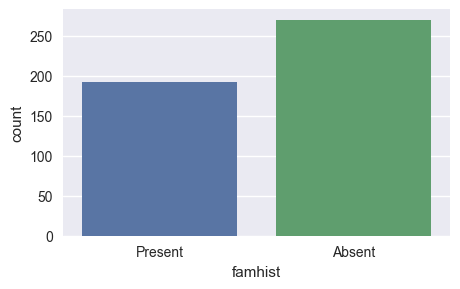

In [20]:
# Distribucion de categorias (forma2)
sns.countplot(df['famhist'])

<AxesSubplot:xlabel='chd', ylabel='count'>

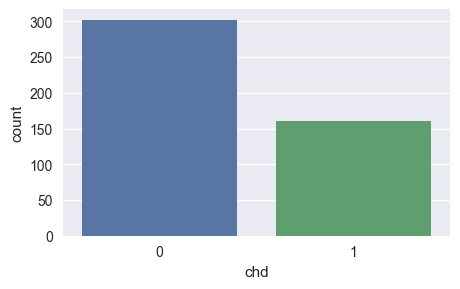

In [21]:
sns.countplot(df['chd'])

# Desafío 2: Estimar modelo

1. Recodifique <code>famhist a una dummy</code>, asignando 1 a la categoría minoritaria.
2. Utilice <code>smf.logit </code>para estimar el modelo.
3. Implemente una función <code>inverse_logit</code> que realice el mapeo de <code>log-odds a probabilidad</code>.
4. Con el modelo estimado, responda lo siguiente:
    - ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
    - ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
    - ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?
    - Replique el modelo con <code>smf.ols</code> y comente las similitudes entre los coeficientes estimados.

In [22]:
df['famhist'] = df['famhist'].replace(['Absent', 'Present'], [0, 1])

#Otras formas de realizarlo:

#pd.get_dummies(df, columns=['famhist'], drop_first=True) 
#df['famhist'] = np.where(df['famhist']=='Present', 1, 0)
#df.loc[df.famhist == 'Absent','famhist'] = 0
#df.loc[df.famhist == 'Present','famhist'] = 1

In [23]:
#Se realiza el modelo de regresion
model_1 = smf.logit('chd ~ famhist', df).fit()
model_1.summary()

#El valor absoluto de z es mayor a 1.96
#P>|z| es muy bajo
#El intervalo no pasa por cero


Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                 0.05740
Time:                        21:09:25   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist        1.1690      0.203      5.751      0.000       0.771       1.567
==============================================================================
"""

In [24]:
# Funcion sigmoide para calcular la probabilidad
def inverse_logit(x):
    return 1 / (1 + np.exp(-x))

In [25]:
prob_famhist = inverse_logit(model_1.params['Intercept'] + model_1.params['famhist'] * 1)
prob_intercept = inverse_logit(model_1.params['Intercept'] + model_1.params['famhist'] * 0)

print(f"La probabilidad de tener una enfermedad es de {prob_famhist} cuando existe antecedentes familiares")
print(f"La probabilidad de tener una enfermedad es de {round(prob_intercept,2)} cuando no existen antecedentes familiares")
print(f"Un individuo con antecedentes familiares tiene {round(prob_famhist - prob_intercept,2)} mas de tener enfermedades cardiácas")


La probabilidad de tener una enfermedad es de 0.5 cuando existe antecedentes familiares
La probabilidad de tener una enfermedad es de 0.24 cuando no existen antecedentes familiares
Un individuo con antecedentes familiares tiene 0.26 mas de tener enfermedades cardiácas


In [26]:
#Se replica el modelo con smf.ols
model_ols = smf.ols('chd ~ famhist', df).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           2.66e-09
Time:                        21:09:26   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2370      0.028      8.489      0.000       0.182       0.292
famhist        0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Desafío 3: Estimación completa

- Depure el modelo manteniendo las variables con significancia estadística al 95%.
- Compare los estadísticos de bondad de ajuste entre ambos.
- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [27]:
model_2 = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age', df).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.2080
Time:                        21:09:26   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
typea          0.0396      0.012      3.214      0.001       0.015       0.064
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
age            0.0452      0.012      3.728      0.000       0.021       0.069
==============================================================================
"""

In [28]:
#Filtrando por variables significativas
model_3 = smf.logit('chd ~ tobacco + ldl  + famhist + typea + age', df).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            5
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.2020
Time:                        21:09:26   Log-Likelihood:                -237.84
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.554e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4464      0.921     -7.000      0.000      -8.251      -4.642
tobacco        0.0804      0.026      3.106      0.002       0.030       0.131
ldl            0.1620      0.055      2.947      0.003       0.054       0.270
famhist        0.9082      0.226      4.023      0.000       0.466       1.351
typea          0.0371      0.012      3.051      0.002       0.013       0.061
age            0.0505      0.010      4.944      0.000       0.030       0.070
==============================================================================
"""

In [29]:
log_odds = model_3.params['Intercept'] + \
            model_3.params['tobacco'] * 100 + \
            model_3.params['ldl'] + \
            model_3.params['famhist'] + \
            model_3.params['typea'] + \
            model_3.params['age']

# Desafío 4: Estimación de perfiles

- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [30]:
#Funcion pasando el modelo
def predict_proba(model=model_3, **values):
    values = pd.Series(values)
    log_odds = sum(model.params*pd.Series(values))
    prob = inverse_logit(log_odds)
    return prob

In [31]:
#Probabilidad PROMEDIO
prob_profile_mean = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )
prob_profile_mean

0.29370927481586934

In [32]:
#Probabilidad LDL
high = 0.8 #Alto ldl
low = 0.2 #Bajo ldl

prob_profile_ldl_high = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].quantile(high),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )

prob_profile_ldl_low = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].quantile(low),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )
prob_profile_ldl_high, prob_profile_ldl_low

(0.34275863459388917, 0.24186028976271584)

## OTRAS VARIABLES

In [33]:
## TOBACCO
prob_profile_tobacco_high = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].quantile(high),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )

prob_profile_tobacco_low = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].quantile(low),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )

## TYPEA
prob_profile_typea_high = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].quantile(high),
                                  age=df['age'].mean(),
                                 )

prob_profile_typea_low = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].quantile(low),
                                  age=df['age'].mean(),
                                 )

## AGE
prob_profile_age_high = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].quantile(high),
                                 )

prob_profile_age_low = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=df['famhist'].mean(),
                                  typea=df['typea'].mean(),
                                  age=df['age'].quantile(low),
                                 )

## FAMHIST
prob_profile_famhist_1 = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=1,
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )

prob_profile_famhist_0 = predict_proba(Intercept=1,
                                  tobacco=df['tobacco'].mean(),
                                  ldl=df['ldl'].mean(),
                                  famhist=0,
                                  typea=df['typea'].mean(),
                                  age=df['age'].mean(),
                                 )

In [34]:
#Serie con resultados
prob_dict = pd.Series({'average' : prob_profile_mean,
                     'ldl_high': prob_profile_ldl_high,
                     'ldl_low' : prob_profile_ldl_low,
                     'age_high' : prob_profile_age_high,
                     'age_low' : prob_profile_age_low,
                     'typea_high' : prob_profile_typea_high,
                     'typea_low' : prob_profile_typea_low,
                     'tobacco_high' : prob_profile_tobacco_high,
                     'tobacco_low' : prob_profile_tobacco_low,
                     'famhist_1' : prob_profile_famhist_1,
                     'famhist_0' : prob_profile_famhist_0})
prob_dict.sort_values()

age_low         0.164508
famhist_0       0.221860
tobacco_low     0.236918
ldl_low         0.241860
typea_low       0.242119
average         0.293709
tobacco_high    0.337409
ldl_high        0.342759
typea_high      0.357927
famhist_1       0.414187
age_high        0.472217
dtype: float64

## EXTRAS

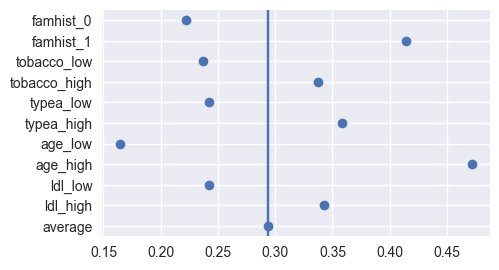

In [35]:
plt.plot(prob_dict,  prob_dict.index, 'o')
plt.axvline(prob_dict['average'])

### TEST KS 
Test entre 2 distribuciones para medir la distancia entre ambas

In [36]:
from scipy.stats import ks_2samp

def ks_statistic(df, var_obj, cols):
    ks = []
    for v in cols:
        ks_i = ks_2samp(df.loc[df[var_obj] == 1, v], df.loc[df[var_obj] == 0, v]).statistic
        ks.append(ks_i)
    
    data_ks = pd.DataFrame({'var':cols, 'ks':ks})
    return data_ks.sort_values('ks', ascending=False)
    

In [37]:
var_obj='chd' # Variable objetivo
cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

ks_statistic(df, var_obj, cols) 

,var,ks
8,age,0.350538
1,tobacco,0.309230
4,famhist,0.282119
2,ldl,0.257781
3,adiposity,0.233113
0,sbp,0.166680
6,obesity,0.131705
7,alcohol,0.099627
5,typea,0.092177


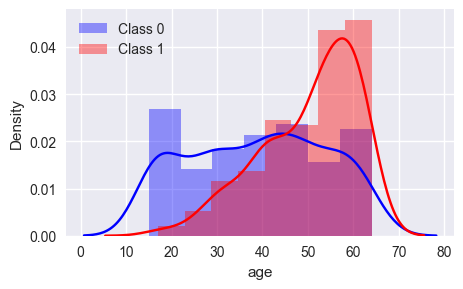

In [38]:
#ver las curvas resultantes
var = 'age'
#var = 'alcohol'
#var = 'tobacco'

sns.distplot(df.loc[df[var_obj]==0, var], color='blue', label='Class 0')
sns.distplot(df.loc[df[var_obj]==1, var], color='red', label='Class 1')
plt.legend()